<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)

In [42]:
df.dropna(inplace=True)

In [43]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [44]:
df.index.freq = 'MS'

In [45]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [46]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [48]:
span = 12
alpha = 2/(span+1)

In [49]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [50]:
df.head()

,Thousands of Passengers,EWMA-12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [51]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [52]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [53]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [54]:
df.head()

,Thousands of Passengers,EWMA-12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [57]:
df.head()

,Thousands of Passengers,EWMA-12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336233
1949-02-01,118,112.923077,112.923077,120.336233
1949-03-01,132,115.857988,115.857988,134.336233
1949-04-01,129,117.879836,117.879836,131.336233
1949-05-01,121,118.359861,118.359861,123.336233


In [58]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES12', 'DES_add_12'], dtype='object')

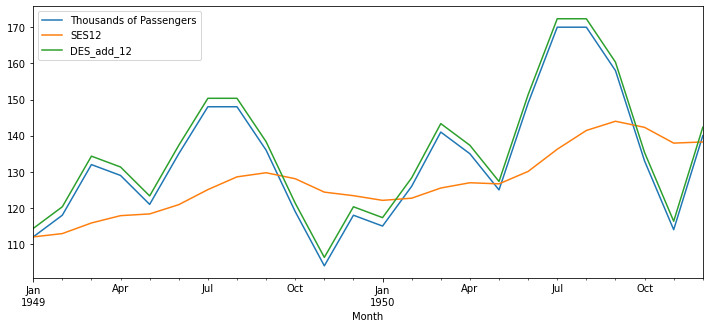

In [61]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))

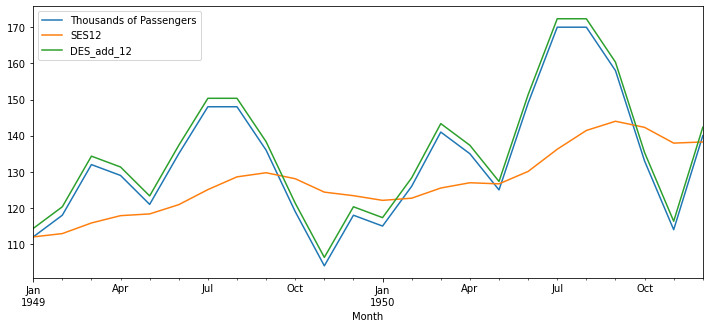

In [67]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))

In [63]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [65]:
df.head()

,Thousands of Passengers,EWMA-12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247
1949-02-01,118,112.923077,112.923077,120.336233,118.051885
1949-03-01,132,115.857988,115.857988,134.336233,132.058041
1949-04-01,129,117.879836,117.879836,131.336233,129.056722
1949-05-01,121,118.359861,118.359861,123.336233,121.053204


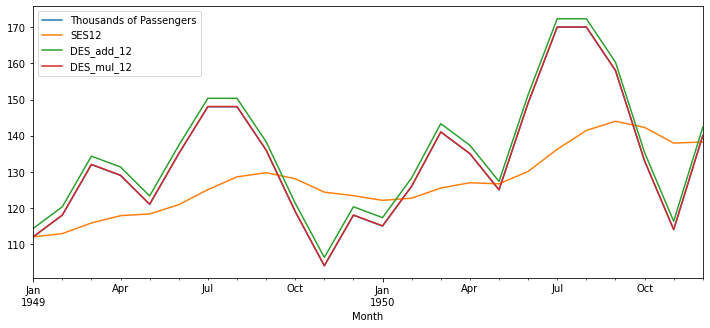

In [66]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [69]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

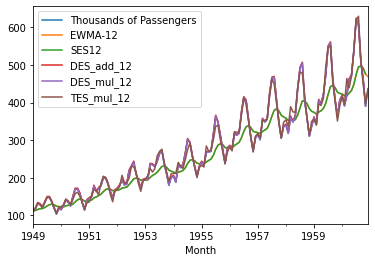

In [70]:
df.plot()

In [71]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

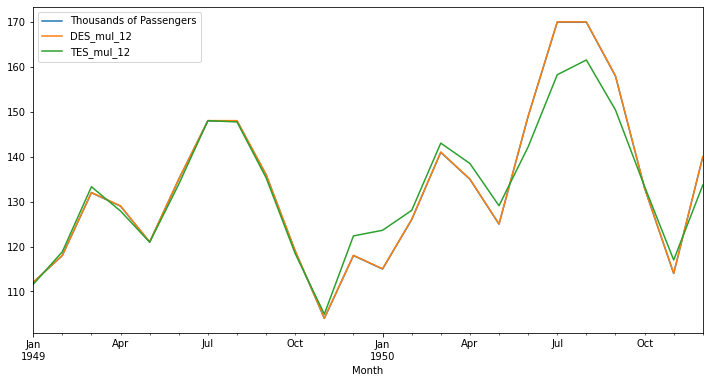

In [74]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6))

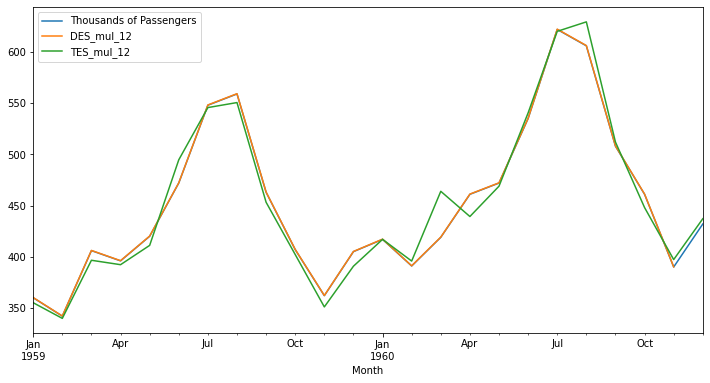

In [75]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,6))